# Algoritmos de Inteligência Artificial para clusterização [25E4_2]

# Parte 1 - Infraestrutura

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. Você está rodando em Python 3.9+

In [1]:
!pyenv versions

  system
  3.8.20
  3.8.20/envs/data_science_rnn
  3.10.14
  3.10.14/envs/clusterizacao
  3.10.14/envs/dnn_api
  3.11.9
  3.11.9/envs/cwenv
* clusterizacao --> /home/pmneto/.pyenv/versions/3.10.14/envs/clusterizacao (set by PYENV_VERSION environment variable)
  cwenv --> /home/pmneto/.pyenv/versions/3.11.9/envs/cwenv
  data_science_rnn --> /home/pmneto/.pyenv/versions/3.8.20/envs/data_science_rnn
  dnn_api --> /home/pmneto/.pyenv/versions/3.10.14/envs/dnn_api



2. Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [2]:
import sys

if sys.prefix != sys.base_prefix:
    print("Estamos em um ambiente virtual.")
    print("Venv:", sys.prefix)
else:
    print("Não estamos em venv (é o sistema global)")

Estamos em um ambiente virtual.
Venv: /home/pmneto/.pyenv/versions/3.10.14/envs/clusterizacao


3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [3]:
!pip list

Package                   Version
------------------------- -----------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.2.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.4
comm                      0.2.3
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
exceptiongroup            1.3.0
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.60.1
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx                     0.28.1
idna                      3.11
ipykernel        

4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [4]:
!python -m pip freeze > requirements.txt

In [5]:
!ls -a 

.   Downloads		outputs			requirements.txt
..  .ipynb_checkpoints	pd_clusterizacao.ipynb


5. Tire um printscreen do ambiente que será usado rodando em sua máquina.

In [6]:
import sys, platform
print("Python:", sys.version)
print("Prefix:", sys.prefix)
print("Sistema:", platform.platform())


Python: 3.10.14 (main, Jun 23 2025, 18:55:56) [GCC 12.2.0]
Prefix: /home/pmneto/.pyenv/versions/3.10.14/envs/clusterizacao
Sistema: Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.36


6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

# Parte 2 -  Escolha de base de dados

1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [7]:
import platform
import os
from pathlib import Path


dataset_url = "https://www.kaggle.com/api/v1/datasets/download/rohan0301/unsupervised-learning-on-country-data"

current_directory = Path.cwd()
system = platform.system()




if system == "Windows":
    print("Sistema Operacional Windows")
    win_dir = fr"{current_directory}\Downloads\unsupervised-learning-on-country-data.zip"
    !curl -L -o "{win_dir}" {dataset_url}
    print(f"Arquivo salvo em: {win_dir}")

elif system == "Linux":
    print("Sistema Operacional Linux")
    directory_path = Path("./Downloads/")
    print('Criando diretório Linux')
    directory_path.mkdir(parents=True, exist_ok=True)
    linux_dir = os.path.expanduser(f"{directory_path}/unsupervised-learning-on-country-data.zip") 
    print(f"Diretório '{directory_path}' criado com sucesso.")
    
    !curl -L -o "{linux_dir}" {dataset_url}
    print(f"Arquivo salvo em: {linux_dir}")

else:
    print("⚠️ Sistema desconhecido:", system)


Sistema Operacional Linux
Criando diretório Linux
Diretório 'Downloads' criado com sucesso.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5340  100  5340    0     0   6298      0 --:--:-- --:--:-- --:--:--  6298
Arquivo salvo em: Downloads/unsupervised-learning-on-country-data.zip


In [8]:
import zipfile


if system == "Windows":
    print("Sistema Operacional Windows")
    path_dir = win_dir
    dest_dir = r"\Downloads\country_data"
    os.makedirs(dest_dir, exist_ok=True)
    
elif system == "Linux":
    print("Sistema Operacional Linux")
    dest_dir = os.path.expanduser(f"./Downloads/country_data")
    os.makedirs(dest_dir, exist_ok=True)
    path_dir = linux_dir
    
else:
    print("⚠️ Sistema desconhecido:", system)


with zipfile.ZipFile(path_dir, 'r') as zip_ref:
 zip_ref.extractall(dest_dir)

print(f"Todos os arquivos extraídos para: {dest_dir}")

Sistema Operacional Linux
Todos os arquivos extraídos para: ./Downloads/country_data


In [9]:
import pandas as pd


df = pd.read_csv(f"{dest_dir}/Country-data.csv")
display(df)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
data_dictionary = pd.read_csv(f"{dest_dir}/data-dictionary.csv")
print("\n\n\nDicionário de dados: \n\n\n")
display(data_dictionary)




Dicionário de dados: 





,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


2. Quantos países existem no dataset?

In [11]:
df.index.max()

166

3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [13]:
num_cols = df.select_dtypes(include="number").columns.tolist()
if 'country' in num_cols:
    num_cols.remove('country')


desc = df[num_cols].describe().T
desc["range"] = desc["max"] - desc["min"]
desc = desc[["count", "mean", "std", "min", "max", "range"]].sort_values("range", ascending=False)
print("\n\nEstatísticas numéricas básicas:\n\n\n")
desc



Estatísticas numéricas básicas:





,count,mean,std,min,max,range
income,167.0,17144.688623,19278.067698,609.0000,125000.00,124391.0000
gdpp,167.0,12964.155689,18328.704809,231.0000,105000.00,104769.0000
child_mort,167.0,38.270060,40.328931,2.6000,208.00,205.4000
exports,167.0,41.108976,27.412010,0.1090,200.00,199.8910
imports,167.0,46.890215,24.209589,0.0659,174.00,173.9341
inflation,167.0,7.781832,10.570704,-4.2100,104.00,108.2100
life_expec,167.0,70.555689,8.893172,32.1000,82.80,50.7000
health,167.0,6.815689,2.746837,1.8100,17.90,16.0900
total_fer,167.0,2.947964,1.513848,1.1500,7.49,6.3400


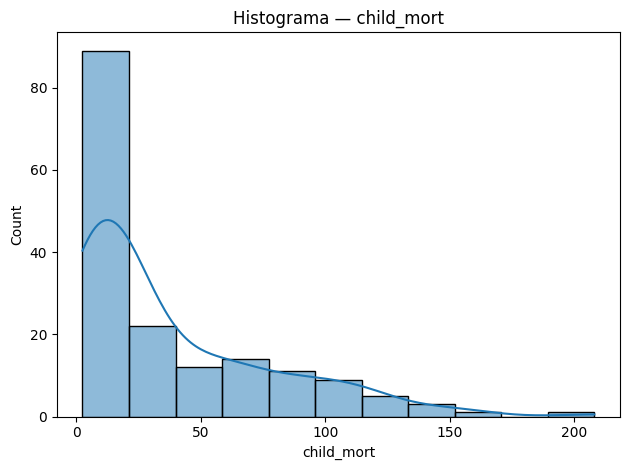

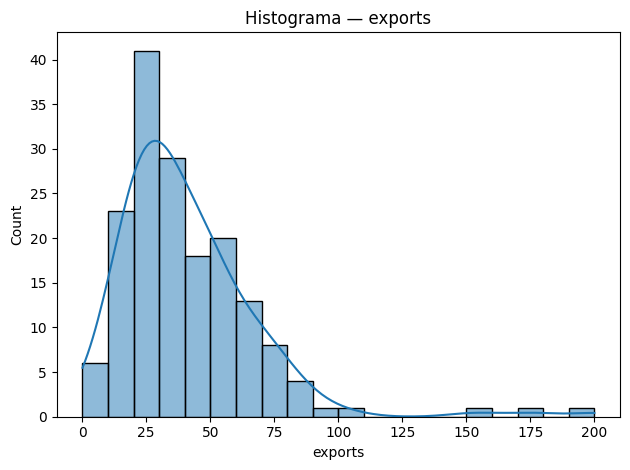

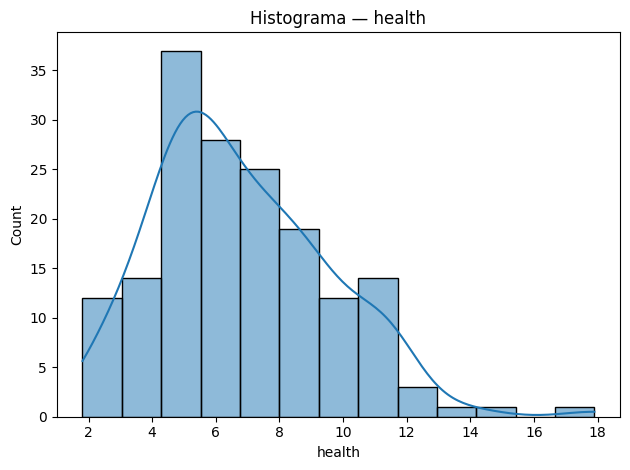

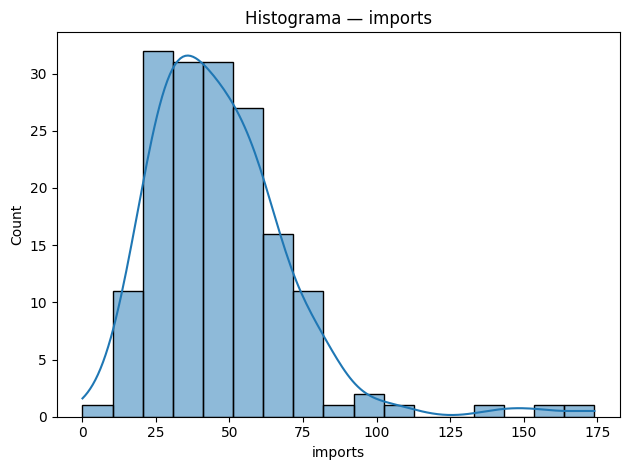

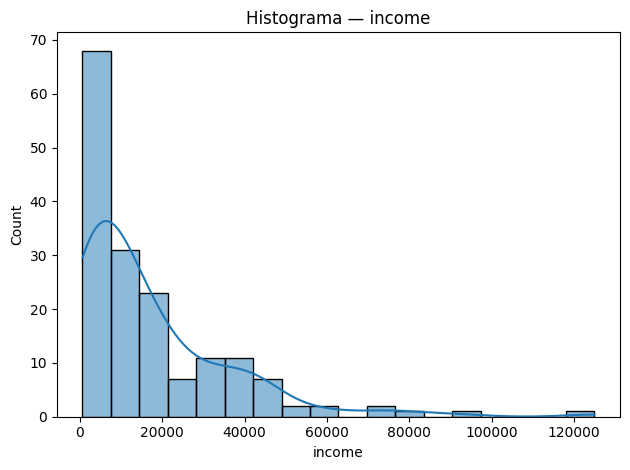

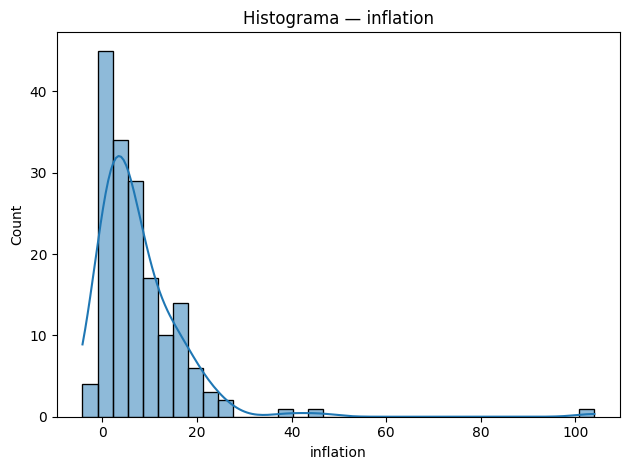

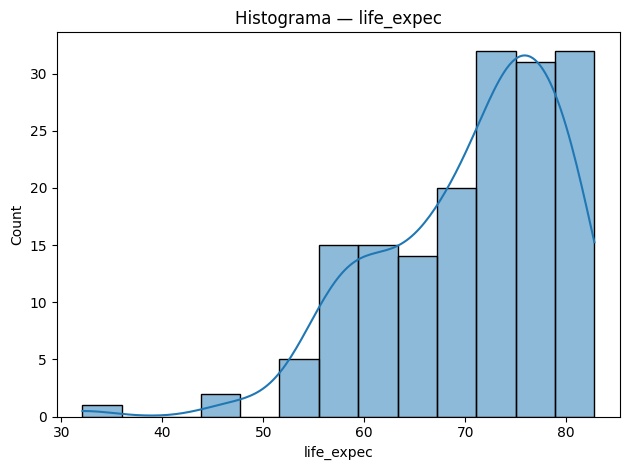

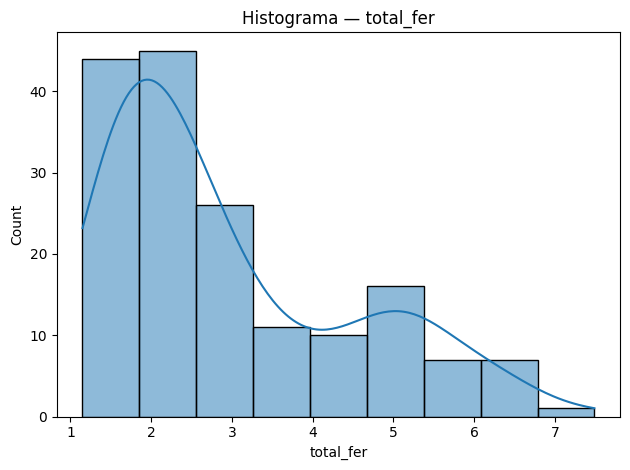

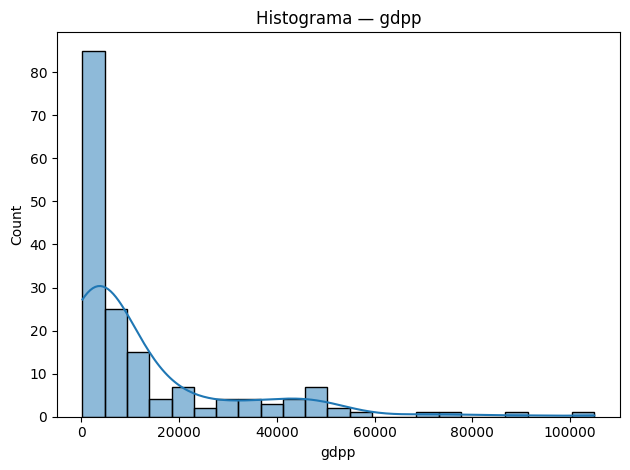

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("outputs", exist_ok=True)

for c in num_cols:
    plt.figure()
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f"Histograma — {c}")
    plt.tight_layout()
    plt.savefig(f"outputs/hist_{c}.png")
    plt.show()

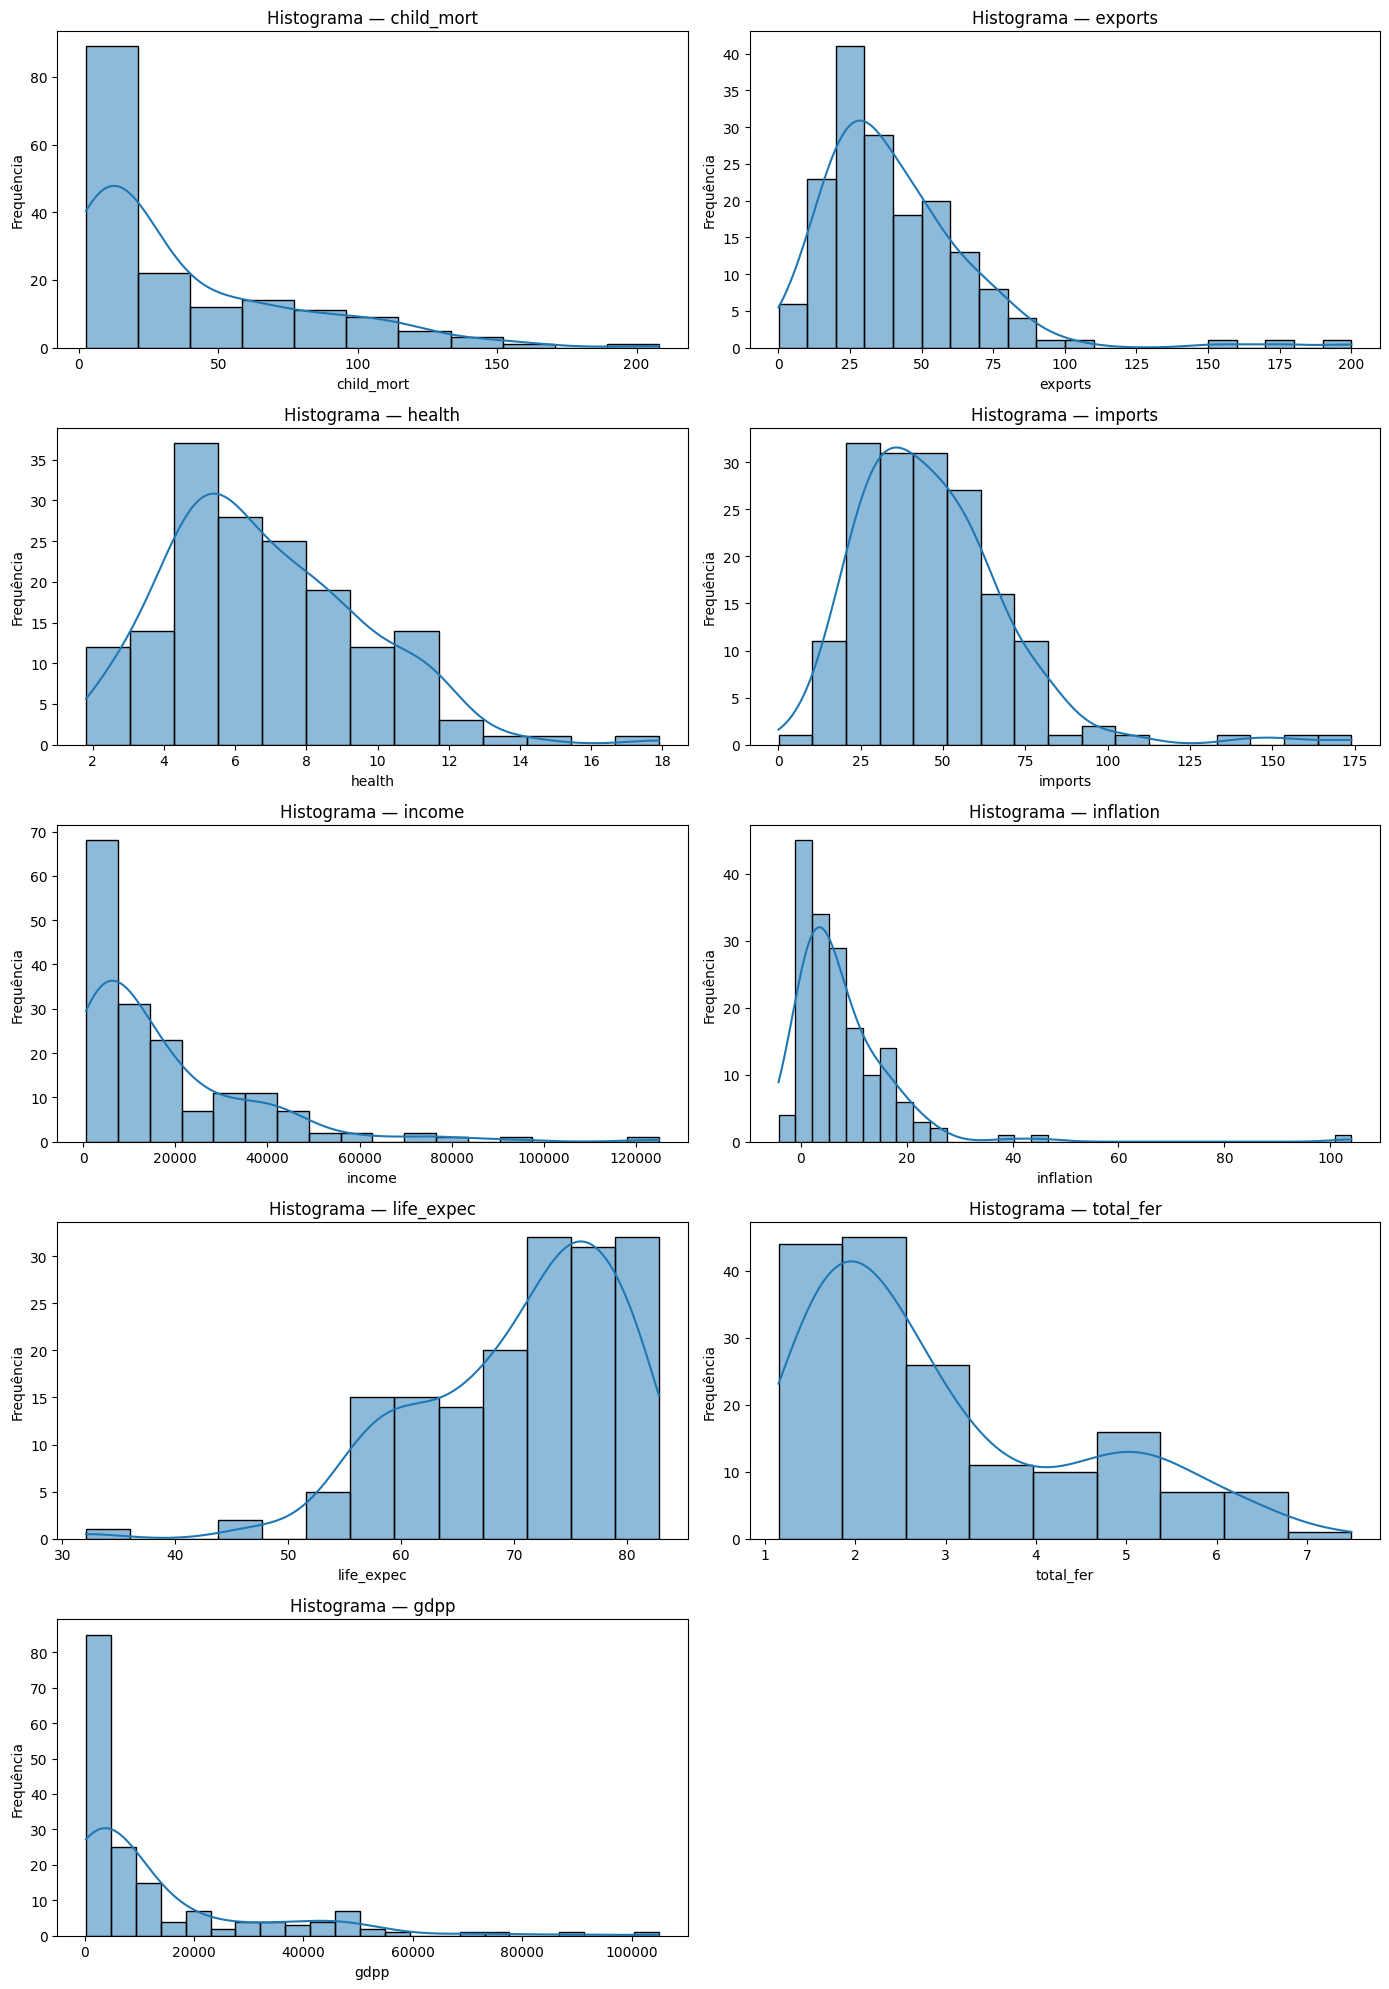

In [15]:
# Define grid (2 colunas)
n = len(num_cols)
cols = 2
rows = (n + cols - 1) // cols  # arredondamento

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for ax, c in zip(axes, num_cols):
    sns.histplot(df[c].dropna(), kde=True, ax=ax)
    ax.set_title(f"Histograma — {c}")
    ax.set_ylabel("Frequência")

# Esconde eixos vazios (caso número ímpar de colunas)
for i in range(len(num_cols), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.savefig("outputs/histogramas_completos.png")
plt.show()

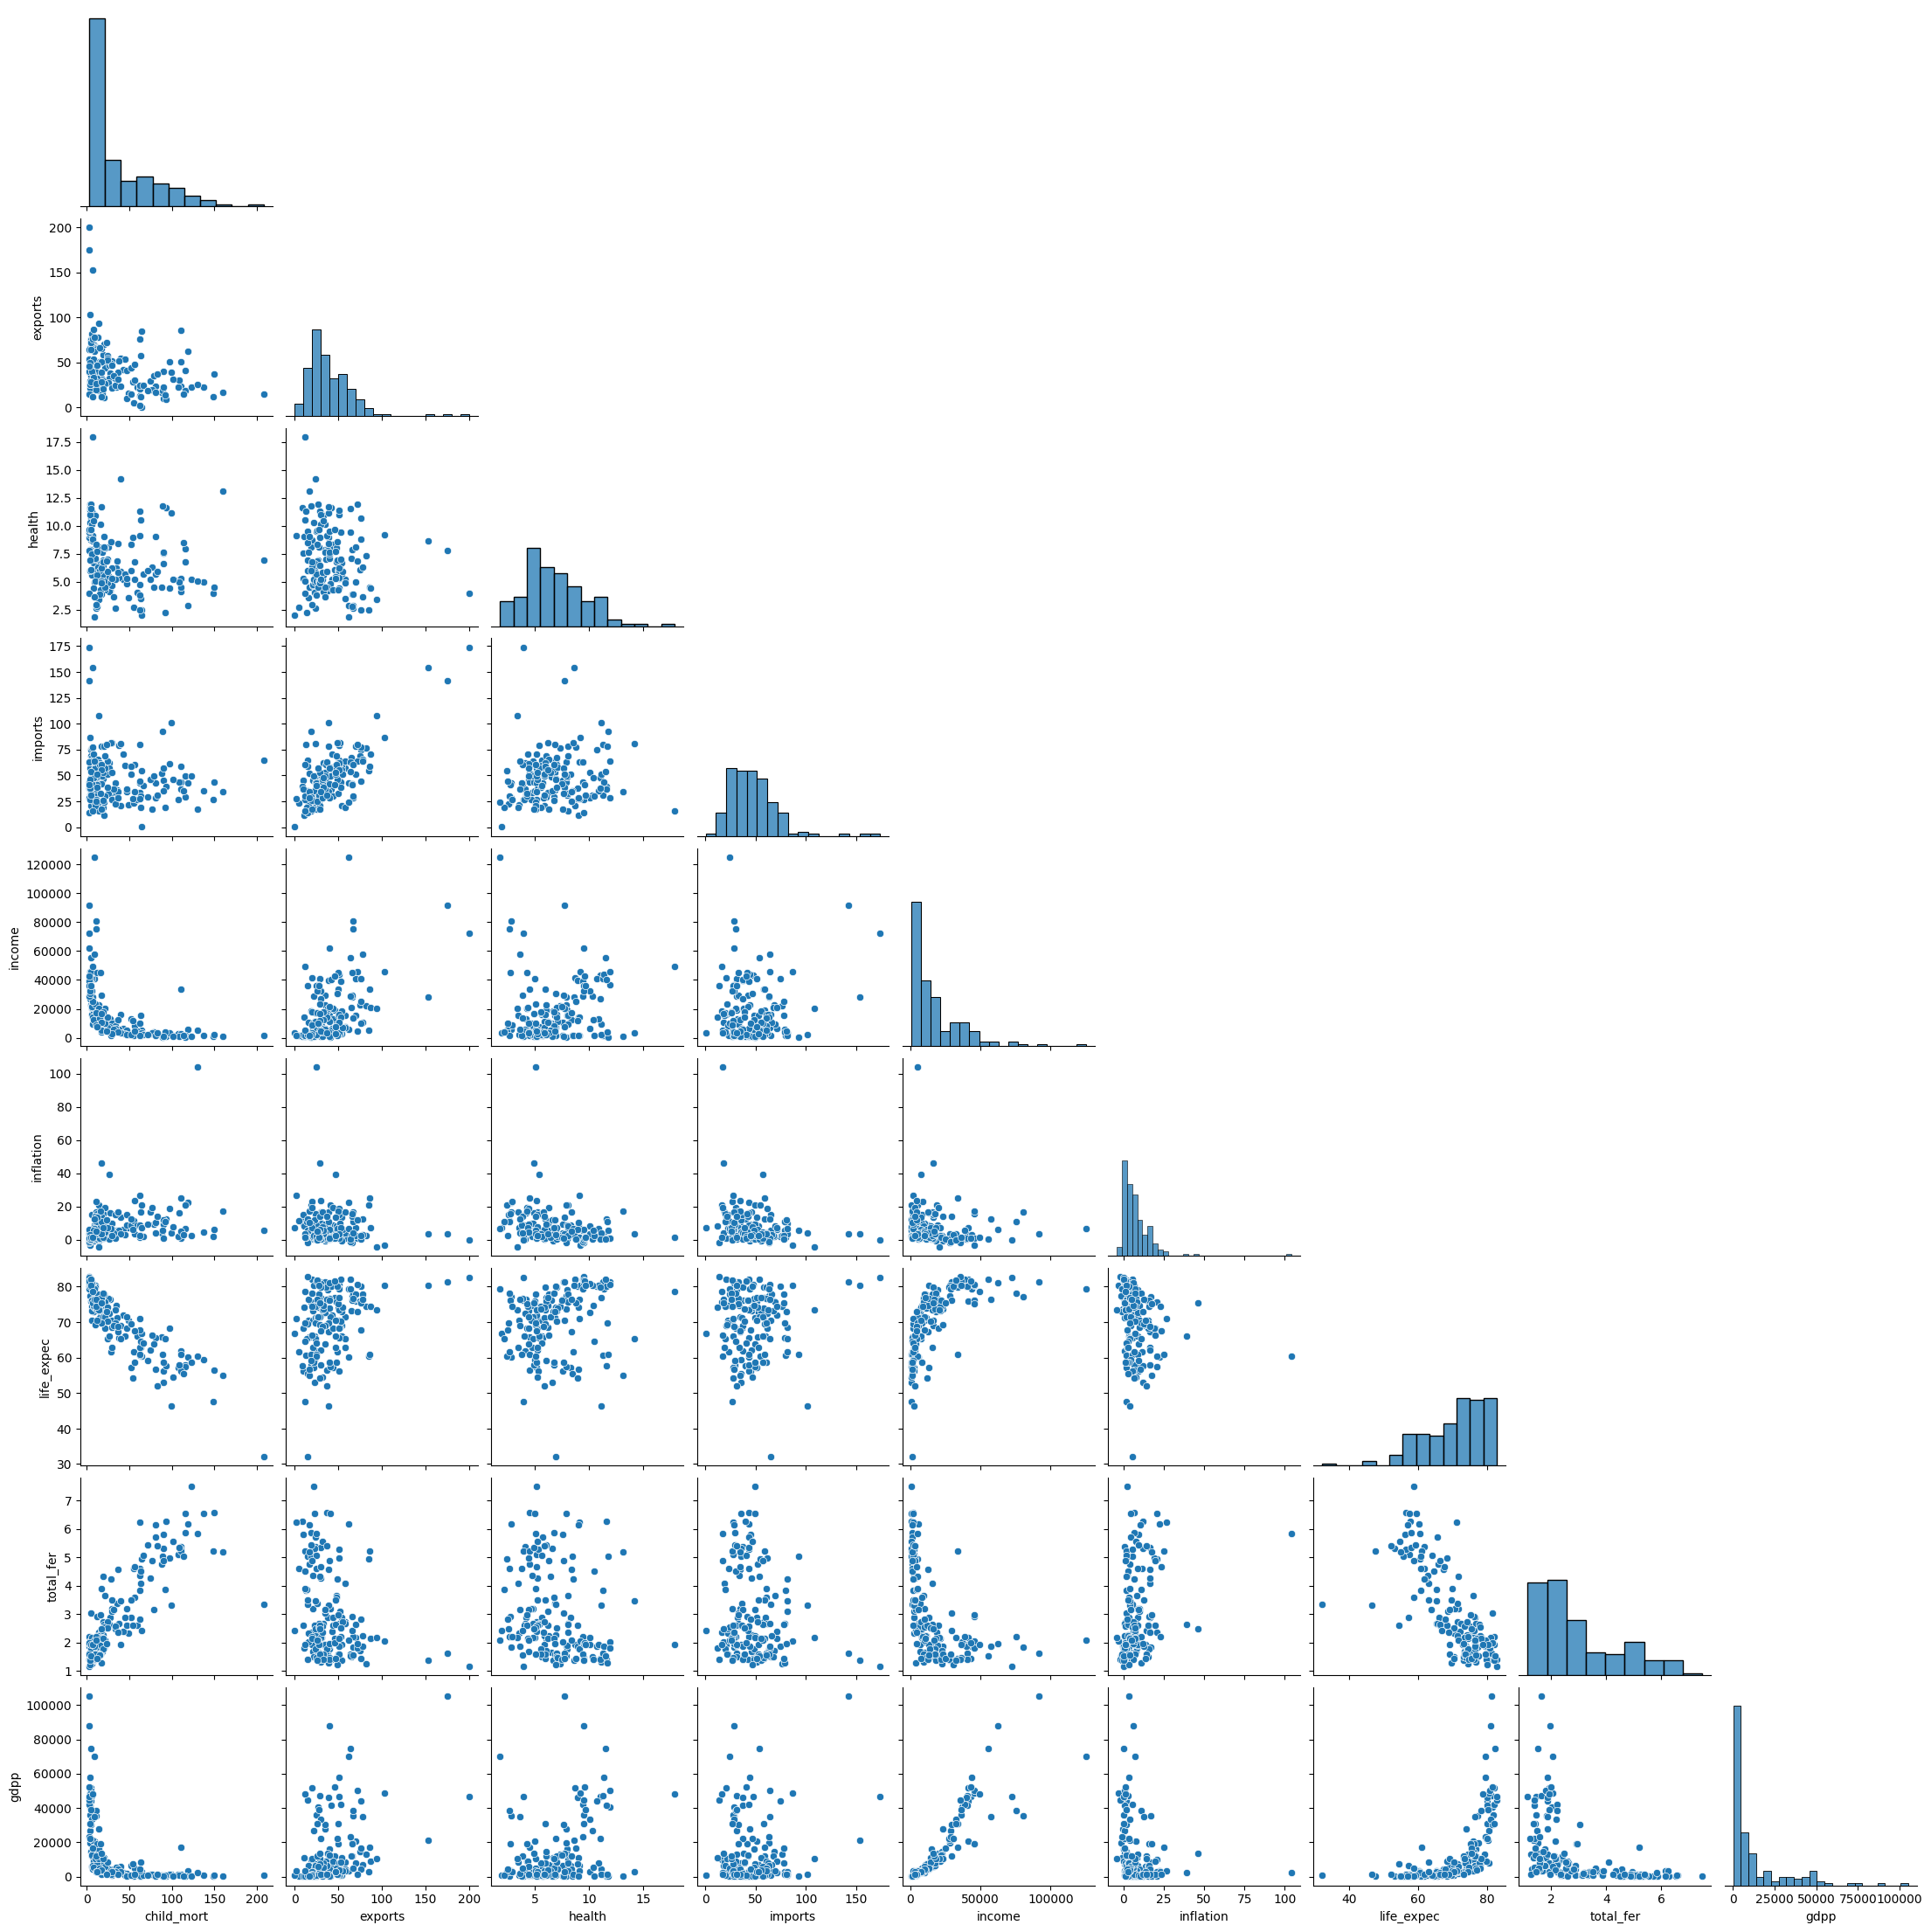

In [16]:
sns.pairplot(df[num_cols], corner=True)
plt.savefig("outputs/pairplot_countries.png")
plt.show()

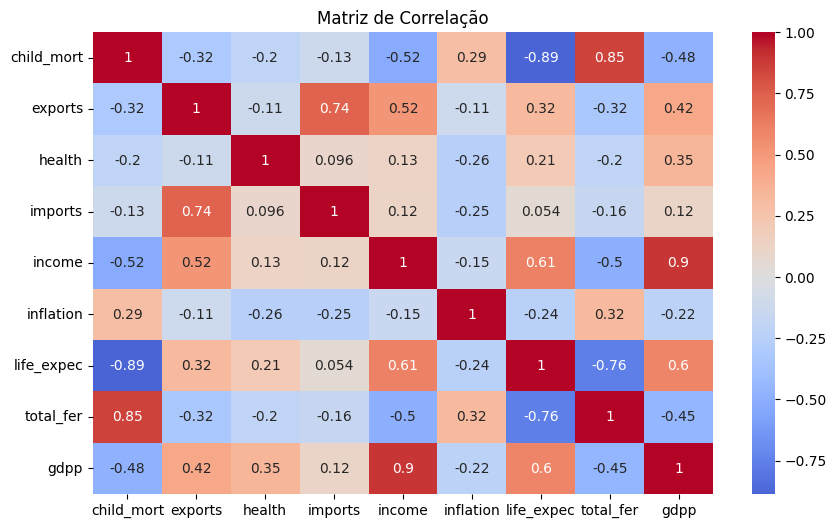

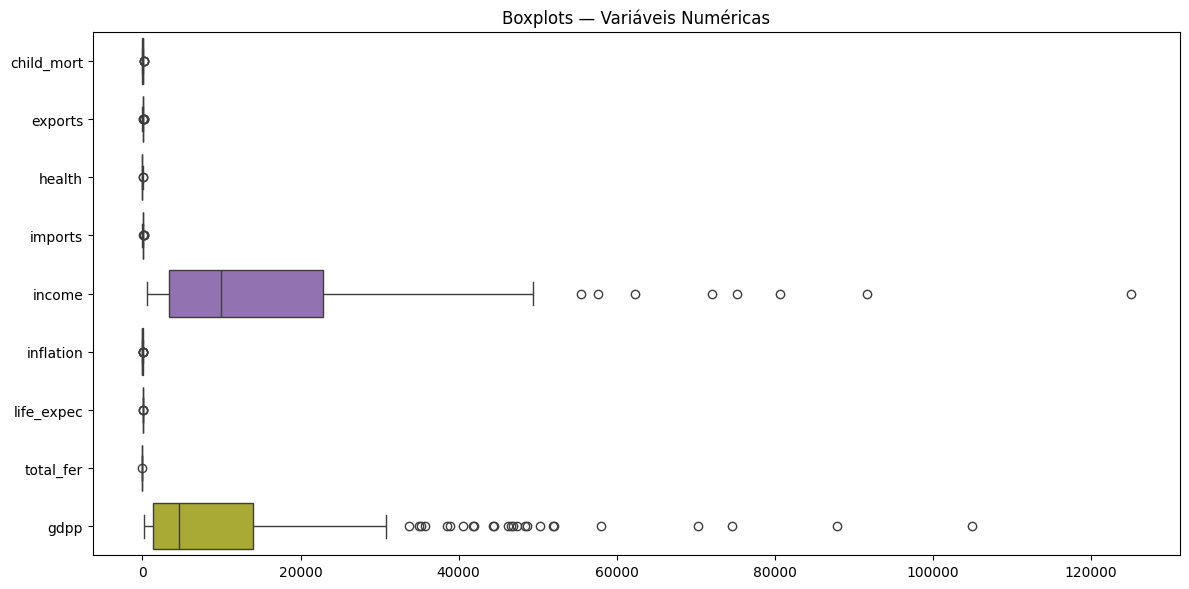

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.savefig(f"outputs/correlation_matrix.png")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title("Boxplots — Variáveis Numéricas")
plt.tight_layout()
plt.savefig("outputs/boxplots_todos.png")
plt.show()

###







###







### Identificando outliers

* Coluna "Income":

In [18]:
df_filtered = df[df['income'] > 120000]
display(df_filtered)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


* Coluna "gdpp":

In [19]:
df_filtered = df[df['gdpp'] > 100000]
display(df_filtered)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000


4. Realize o pré-processamento adequado dos dados.

* O dataset não apresenta valores nulos

* Usando escala nas variáveis:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

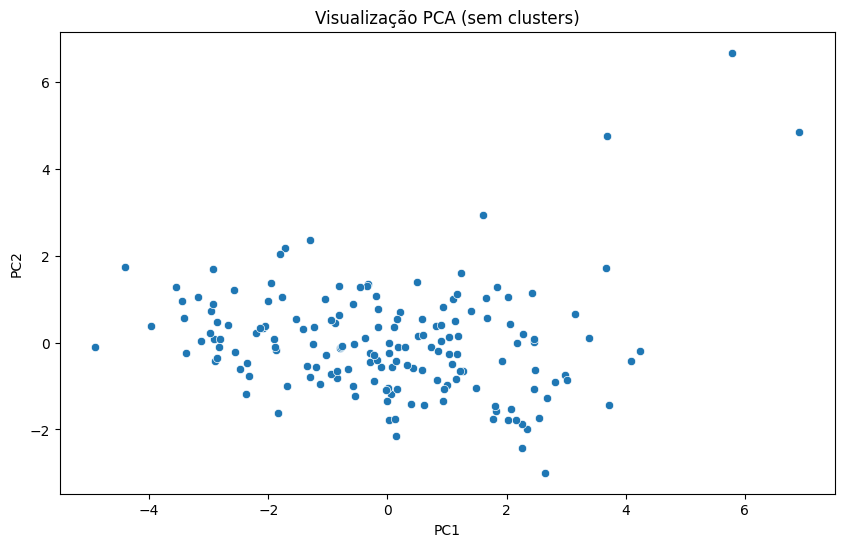

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.title("Visualização PCA (sem clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("outputs/pca_sem_cluster.png")
plt.show()


###







###







###







# Parte 3 - Clusterização

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
   - **K-Médias**
   - **Clusterização Hierárquica**


In [22]:
#clusterização
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, labels_km)

0.285600988953231

In [24]:
work_df = df.copy()
work_df["cluster_kmeans"] = labels_km

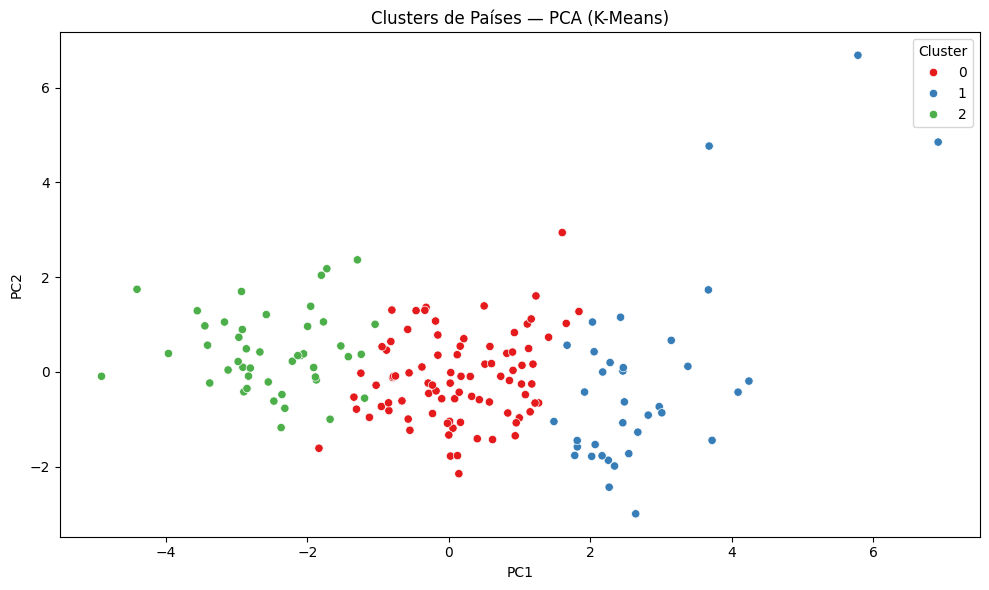

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduz para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gráfico com os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_km, palette="Set1")
plt.title("Clusters de Países — PCA (K-Means)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("outputs/pca_paises.png")
plt.show()

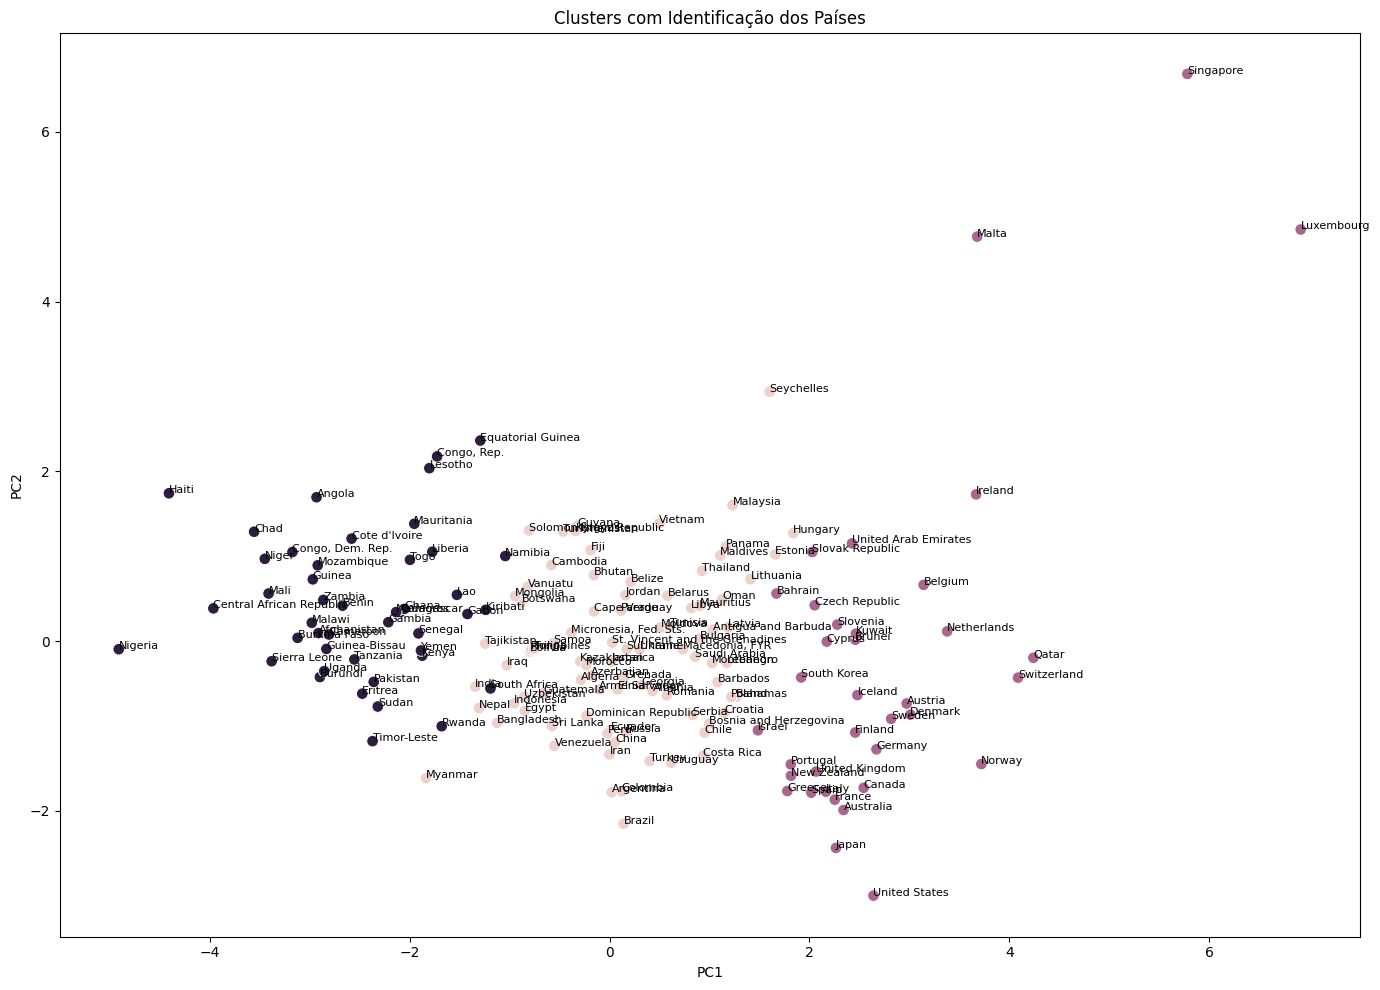

In [26]:
plt.figure(figsize=(14, 10))
for i in range(len(df)):
    plt.text(X_pca[i,0], X_pca[i,1], df['country'][i], fontsize=8)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_km, legend=False, s=70)
plt.title("Clusters com Identificação dos Países")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("outputs/pca_paises_identificados.png")
plt.show()


In [27]:
df_clusters = df.copy()
df_clusters["cluster_kmeans"] = labels_km
df_clusters.sort_values("cluster_kmeans").head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0


###







###







###







2. Para os resultados do K-Médias:
   - Interprete cada um dos clusters obtidos citando:
     1. Qual a distribuição das dimensões em cada grupo
     2. O país que, de acordo com o algoritmo, melhor representa o seu agrupamento (justifique)

In [28]:
#Determinando os centroides aplicados aos clusters
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=num_cols)
centroids_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.393282,-0.030584,-0.206179,0.019562,-0.250930,-0.005783,0.226762,-0.402579,-0.355832
1,-0.827449,0.645080,0.727411,0.190639,1.484243,-0.484921,1.079579,-0.791877,1.615995
2,1.413564,-0.457615,-0.187898,-0.189897,-0.707839,0.398989,-1.297031,1.402874,-0.612761


In [29]:
#Designando o perfil de cada cluster baseado em mediana
profile_km = df_clusters.groupby('cluster_kmeans')[num_cols].median().round(2)
profile_km

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_kmeans,,,,,,,,,
0,18.7,37.65,5.99,48.65,10450.0,5.94,73.45,2.26,4670.0
1,4.2,50.35,9.44,39.05,40550.0,1.19,80.35,1.82,41200.0
2,90.3,23.80,5.30,40.30,1850.0,8.79,59.50,5.11,769.0


Aproximando o perfil de cada cluster com a mediana, conseguimos identificar de forma bastante clara algumas tendências:


***Os clusters subdivididos em três, podem identificar-se de academicamente como:***

* Cluster 1: Países Desenvolvidos
* Cluster 0: Países em desenvolvimento
* Cluster 2: Países Subdesenvolvidos

E esta relação se explica pela taxa de mortalidade infantil, que é bastante destacada tanto em casos de subdesenvolvimento como de desenvolvimento, além é claro do produto interno bruto per capita que se destaca bem em ambos os extremos.


In [30]:
#Determinando o representante de cada cluster:
import numpy as np
from numpy.linalg import norm

centroids = kmeans.cluster_centers_
rep_rows = []

for cl in range(3):
    idxs = np.where(labels_km == cl)[0]
    cluster_points = X_scaled[idxs]
    centroid = centroids[cl]
    dists = norm(cluster_points - centroid, axis=1)
    best_local_idx = idxs[np.argmin(dists)]
    rep_rows.append({
        "cluster": cl,
        "representante": df.iloc[best_local_idx]["country"],
        "dist": round(float(np.min(dists)), 4),
        "n_paises": len(idxs)
    })

pd.DataFrame(rep_rows)

,cluster,representante,dist,n_paises
0,0,Suriname,0.7198,86
1,1,Iceland,0.7318,36
2,2,Guinea,0.7704,45


***Com relação a determinar o país que melhor representa cada cluster, determinei isto com por meio da distância euclidiana entre os centróides e cada um dos países naqueles clusters. Isto permite identificar matematicamente o país mais próximo do ponto centróide do cluster.***

3. Para os resultados da Clusterização Hierárquica:
   - Apresente o **dendograma** e interprete os resultados


In [31]:
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_scaled, method='ward')
labels_h = fcluster(Z, t=3, criterion='maxclust')

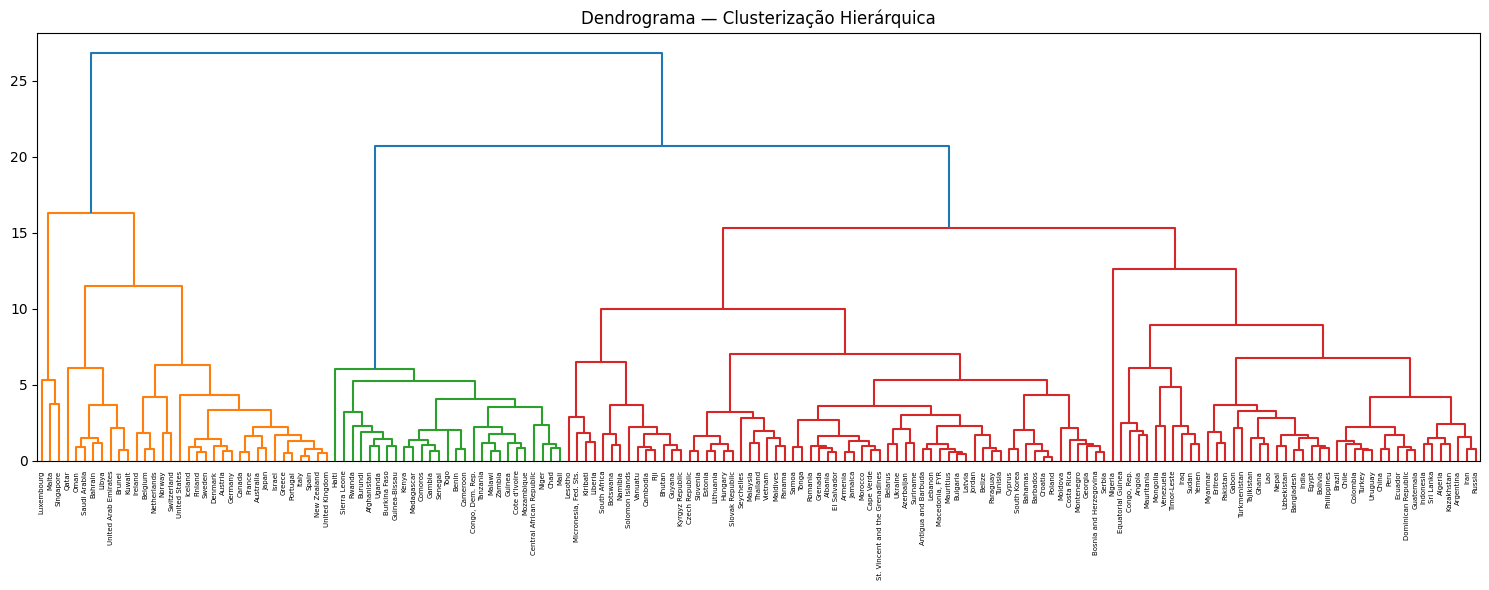

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(15, 6))
dendrogram(Z, labels=df['country'].values, leaf_rotation=90)
plt.title("Dendrograma — Clusterização Hierárquica")
plt.tight_layout()
plt.savefig("outputs/dendograma_clusterizacao.png")
plt.show()

***Os dados são esféricos, bem separáveis ou classificavéis. Por isto, podemos verificar que a clusterização funciona muito bem. Tanto que no dendograma é bastante visivel o agrupamento de países desenvolvidos, que é uma das primeiras distinções que o algoritmo identifica, e a seleção de paises subdesenvolvidos é basicamente a mesma.***


4. Compare os dois resultados:
   - Aponte as **semelhanças e diferenças**
   - Apresente e discuta sua **interpretação**


In [33]:
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(X_scaled, method='ward')  # método ward = distância euclidiana minimizando variância
labels_h = fcluster(Z, t=3, criterion='maxclust')

In [34]:
compare_df = df.copy()
compare_df["cluster_kmeans"] = labels_km
compare_df["cluster_hierarquico"] = labels_h

compare_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarquico
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,3


In [36]:
mapa = {1:0, 2:1, 3:2}
compare_df["cluster_hierarquico_alinhado"] = compare_df["cluster_hierarquico"].map(mapa)

In [38]:
pd.crosstab(compare_df["cluster_kmeans"], compare_df["cluster_hierarquico_alinhado"])

cluster_hierarquico_alinhado,0,1,2
cluster_kmeans,,,
0,3,0,83
1,31,0,5
2,0,27,18


In [39]:
from sklearn.metrics import adjusted_rand_score
score = adjusted_rand_score(compare_df["cluster_kmeans"], compare_df["cluster_hierarquico_alinhado"])
print(score)

0.5628957861161364


***Tendo em vista que os algoritmos agrupam os dados de forma parecida, ambos entendem o destaque do cluster de países desenvolvidos. E a presença dos subdesenvolvidos, divergindo basicamente entre componentes de um e outro cluster (subdesenvolvido e em desenvolvimento).***

Podemos também admitir que os algoritmos tem uma certa similaridade, sobretudo quando visualizamos isto pelo Rand Index entre os clusters. Contudo, é suficiente para traçarmos um paralelo e destacarmos a similaridade.


### Parte 4 — Escolha de Algoritmos


1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.


**Etapas do algoritmo K-Means:**
1. Determinamos o número de clusters (K).
2. Inicialização aleatória dos centróides.
3. Atribuímos cada ponto ao centróide mais próximo.
4. Recomputação dos centróides com base na média dos pontos.
5. Repetição das etapas até que os centróides atinjam convergência.

2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.

***Etapas K-médias readaptadas para K-medóide:***


1. Escolhe-se aleatoriamente K pontos reais da base como medóides iniciais.

2. Cada observação é atribuída ao medóide mais próximo (pela distância euclidiana).

3. Para cada cluster, identifica-se o ponto que minimiza a soma das distâncias para todos os outros pontos do mesmo cluster → esse se torna o novo medóide.

4. Substitui-se o medóide antigo pelo novo e repete-se o processo.

5. O algoritmo converge quando nenhum medóide muda entre as iterações.








3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.


O K-Means usa a média dos pontos para calcular o centróide.
Como a média é fortemente influenciada por valores extremos, um único outlier pode deslocar o centróide e distorcer o formato dos clusters.

4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?


O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) não depende da média ou da distância global entre pontos, mas sim da densidade local. Isto se dá porque:

1. O DBSCAN forma clusters baseando-se na densidade de pontos (ε = raio máximo, minPts = número mínimo de vizinhos).

2. Pontos com baixa densidade (ou seja, isolados) são classificados como outliers (“noise”), e não forçam o modelo a criar novos clusters.

3. Assim, ele ignora ruídos e valores extremos, enquanto o K-Means tenta encaixá-los à força em algum grupo.